In [1]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector,plot_histogram, plot_bloch_vector

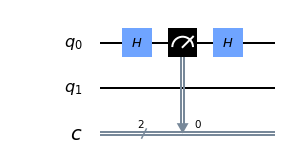

In [2]:
from qiskit.extensions import Initialize # Import the Inititialize function
# Create the X-measurement function:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

# Initialise our qubit and measure it
qc = QuantumCircuit(2,2)
# initial_state = [0,1]
# initializer = Initialize(initial_state)
# initializer.label = "init"
# qc.append(initializer, [0])
x_measurement(qc, 0, 0)
qc.draw(output = 'mpl')

Let's create the function that measures in y basis

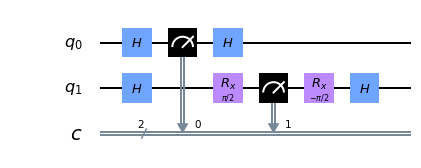

In [3]:
def y_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the Y-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.rx(pi/2, qubit)
    qc.measure(qubit, cbit)
    qc.rx(-pi/2, qubit)
    qc.h(qubit)
    return qc


y_measurement(qc, 1, 1)
qc.draw(output="mpl")

In [4]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
result = execute(qc,backend).result()
out_state = result.get_statevector()
print(out_state)

[ 5.00000000e-01-1.11022302e-16j -5.00000000e-01+1.11022302e-16j
  8.32667268e-17+5.00000000e-01j -8.32667268e-17-5.00000000e-01j]


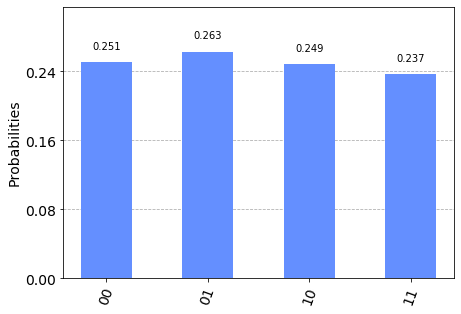

In [10]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)